<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/ANN_with_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Will be training an ANN on `mnist` datsset

In [7]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn ##neural network module
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [5]:
## Libraries have been imported.
## let's create a transform var

t = transforms.ToTensor()

In [10]:
## load the training and testing data
path= 'content/drive/Mydrive/ANN MNIST/'
train_data = datasets.MNIST(root=path, train=True, download=True, transform=t)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/train-images-idx3-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



In [12]:
test_data = datasets.MNIST(root= path, train=False, download=True, transform =t)

In [13]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: content/drive/Mydrive/ANN MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: content/drive/Mydrive/ANN MNIST/
    Split: Test
    StandardTransform
Transform: ToTensor()

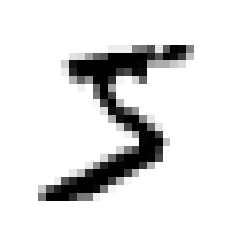

In [29]:
ex_image, ex_lab = train_data[0]
#plt.imshow(ex_image.reshape(28,28))
##plt.imshow(ex_image[0])
plt.imshow(torch.squeeze(ex_image), cmap='gist_yarg' ) ##default cmap 'viridis', 'gray can also be used'
plt.axis('off')
plt.show()

## all  these 3 options printing out the results

In [31]:
## loading in batches
torch.manual_seed(21)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [33]:
for img, lab in train_loader:
  print(img.size())
  print(lab)
  break

torch.Size([100, 1, 28, 28])
tensor([3, 2, 2, 1, 2, 9, 8, 4, 7, 4, 7, 2, 0, 3, 1, 5, 0, 8, 5, 8, 5, 5, 5, 2,
        9, 4, 1, 4, 0, 0, 8, 5, 5, 1, 7, 9, 0, 2, 0, 0, 2, 8, 9, 9, 2, 2, 0, 9,
        6, 4, 3, 5, 9, 5, 9, 2, 9, 2, 1, 4, 9, 1, 7, 0, 1, 7, 5, 2, 0, 2, 7, 9,
        5, 5, 8, 9, 5, 3, 2, 6, 3, 0, 6, 3, 4, 6, 3, 5, 5, 9, 9, 5, 9, 6, 2, 3,
        0, 3, 0, 9])


3       2       2       1       2       9       8       4


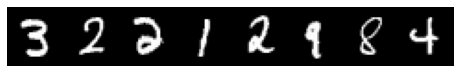

In [70]:
from torchvision.utils import make_grid

print(*lab[:8].numpy(), sep='       ')
im_set = make_grid(img[:8])
plt.figure(figsize=(8,10))
plt.imshow(np.transpose(im_set.numpy(),(1,2,0)))
plt.axis('off')
plt.show()

In [71]:
q = torch.tensor([1,2,3])
q.numpy()

array([1, 2, 3])

In [ ]:
## Let's set the ann

class myANN(nn.module):
  def __init__(self, inp_size, out_size, hidden=[120,84,42]):
    super().__init__()

    self.fully_con1 = nn.Linear(inp_size, hidden[0])
    self.fully_con2 = nn.Linear(hidden[1], hidden[2])
    self.fully_con3 = nn.Linear(hidden[2], out_size)

  
  def forward_pass(self, data):
    data = F.relu(self.fully_con1(data))
    data = F.sigmoid(self.fully_con2(data))
    data = 